# Name: Sarmad Hassan

## The Sparks Foundation: Data Science and Business Analytics Internship

### Task 5: Exploratory Data Analysis: IPL Matches

● Perform Exploratory Data Analysis on dataset Indian Premier League

● As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

● Suggest teams or players a company should endorse for its products.

**Import Libratries**

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Import Dataset**

In [67]:
df = pd.read_csv("matches.csv")
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [68]:
df["team1"] = df["team1"].replace(["Rising Pune Supergiant", "Pune Warriors", "Delhi Daredevils", "Deccan Chargers"], ["Rising Pune Supergiants", "Rising Pune Supergiants", "Delhi Capitals", "Sunrisers Hyderabad"])
df["team2"] = df["team2"].replace(["Rising Pune Supergiant", "Pune Warriors", "Delhi Daredevils", "Deccan Chargers"], ["Rising Pune Supergiants", "Rising Pune Supergiants", "Delhi Capitals", "Sunrisers Hyderabad"])
df["toss_winner"] = df["toss_winner"].replace(["Rising Pune Supergiant", "Pune Warriors", "Delhi Daredevils", "Deccan Chargers"], ["Rising Pune Supergiants", "Rising Pune Supergiants", "Delhi Capitals", "Sunrisers Hyderabad"])
df["winner"] = df["winner"].replace(["Rising Pune Supergiant", "Pune Warriors", "Delhi Daredevils", "Deccan Chargers"], ["Rising Pune Supergiants", "Rising Pune Supergiants", "Delhi Capitals", "Sunrisers Hyderabad"])

In [69]:
# Check Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [70]:
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

**Summary of Dataset**

In [71]:
matches = df.groupby("season")["season"].agg(["count"])
venue = df.groupby("season")["city"].agg([pd.Series.mode])
decision = df.groupby("season")["toss_decision"].agg([pd.Series.mode])
biggest_bat = df.groupby("season")["win_by_wickets"].agg(["max"])
biggest_bowl = df.groupby("season")["win_by_runs"].agg(["max"])
toss = df.groupby("season")["toss_winner"].agg([pd.Series.mode])
best_player = df.groupby("season")["player_of_match"].agg([pd.Series.mode])
best_team = df.groupby("season")["winner"].agg([pd.Series.mode])
seasons = pd.concat([matches, venue, decision, biggest_bat, biggest_bowl, toss, best_player, best_team], axis = 1).reset_index()
seasons.columns = ["Season", "Matches", "Top Venue", "Decision", "Wickets Win", "Runs Win", "Toss", "Best Player", "Best Teams"]
seasons

,Season,Matches,Top Venue,Decision,Wickets Win,Runs Win,Toss,Best Player,Best Teams
0,2008,58,Mumbai,field,10,140,Rajasthan Royals,SE Marsh,Rajasthan Royals
1,2009,57,Durban,bat,10,92,Sunrisers Hyderabad,YK Pathan,Delhi Capitals
2,2010,60,Mumbai,bat,10,98,Chennai Super Kings,SR Tendulkar,Mumbai Indians
3,2011,73,Mumbai,field,10,111,Kings XI Punjab,CH Gayle,Chennai Super Kings
4,2012,74,Chennai,"[bat, field]",10,86,Mumbai Indians,CH Gayle,Kolkata Knight Riders
5,2013,76,"[Bangalore, Chennai, Delhi, Hyderabad, Jaipur,...",bat,10,130,"[Kolkata Knight Riders, Mumbai Indians]",MEK Hussey,Mumbai Indians
6,2014,60,"[Abu Dhabi, Mumbai]",field,9,93,Chennai Super Kings,GJ Maxwell,Kings XI Punjab
7,2015,59,Mumbai,field,10,138,"[Chennai Super Kings, Royal Challengers Bangal...",DA Warner,"[Chennai Super Kings, Mumbai Indians]"
8,2016,60,Bangalore,field,10,144,Sunrisers Hyderabad,V Kohli,Sunrisers Hyderabad
9,2017,59,"[Bangalore, Hyderabad, Mumbai]",field,10,146,Mumbai Indians,"[BA Stokes, NM Coulter-Nile]",Mumbai Indians


**Tie and No Result Matches**

In [72]:
tn = df[(df["result"] == "tie") | (df["result"] == "no result")]
tn = tn[["season", "city", "team1", "team2", "winner", "result"]]
tn

,season,city,team1,team2,winner,result
33,2017,Rajkot,Gujarat Lions,Mumbai Indians,Mumbai Indians,tie
125,2009,Cape Town,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,tie
189,2010,Chennai,Kings XI Punjab,Chennai Super Kings,Kings XI Punjab,tie
300,2011,Delhi,Delhi Capitals,Rising Pune Supergiants,NaN,no result
387,2013,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,tie
400,2013,Bangalore,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,tie
475,2014,Abu Dhabi,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,tie
535,2015,Ahmedabad,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,tie
545,2015,Bangalore,Royal Challengers Bangalore,Rajasthan Royals,NaN,no result
570,2015,Bangalore,Delhi Capitals,Royal Challengers Bangalore,NaN,no result


**Matches in which dl method is applied**

In [73]:
dl = df[df["dl_applied"] == 1]
dl = dl[["season", "city", "team1", "team2", "winner", "win_by_runs", "win_by_wickets"]]
dl

,season,city,team1,team2,winner,win_by_runs,win_by_wickets
56,2017,Bangalore,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,0,7
99,2008,Delhi,Delhi Capitals,Kings XI Punjab,Kings XI Punjab,6,0
102,2008,Kolkata,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,3,0
119,2009,Cape Town,Kings XI Punjab,Delhi Capitals,Delhi Capitals,0,10
122,2009,Durban,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,11,0
148,2009,Centurion,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,12,0
251,2011,Kochi,Chennai Super Kings,Kochi Tuskers Kerala,Kochi Tuskers Kerala,0,7
280,2011,Kolkata,Chennai Super Kings,Kolkata Knight Riders,Kolkata Knight Riders,10,0
290,2011,Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,0,4
488,2014,Delhi,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,0,8


**Team Wins at Home Ground**

In [74]:
home = df[(df["city"] == "Hyderabad") & (df["winner"] == "Sunrisers Hyderabad")
        | (df["city"] == "Mumbai") & (df["winner"] == "Mumbai Indians")
        | (df["city"] == "Pune") & (df["winner"] == "Rising Pune Supergiants")
        | (df["city"] == "Bangalore") & (df["winner"] == "Royal Challengers Bangalore")
        | (df["city"] == "Kolkata") & (df["winner"] == "Kolkata Knight Riders")
        | (df["city"] == "Delhi") & (df["winner"] == "Delhi Capitals")
        | (df["city"] == "Chandigarh") & (df["winner"] == "Kings XI Punjab")
        | (df["city"] == "Chennai") & (df["winner"] == "Chennai Super Kings")
        | (df["city"] == "Jaipur") & (df["winner"] == "Rajasthan Royals")]

home_wins = home.groupby(["winner", "city"])["winner"].agg(["count"]).reset_index()
home_wins.columns = ["Team", "Home Ground", "Home Wins"]
home_wins

,Team,Home Ground,Home Wins
0,Chennai Super Kings,Chennai,40
1,Delhi Capitals,Delhi,31
2,Kings XI Punjab,Chandigarh,22
3,Kolkata Knight Riders,Kolkata,45
4,Mumbai Indians,Mumbai,53
5,Rajasthan Royals,Jaipur,32
6,Rising Pune Supergiants,Pune,9
7,Royal Challengers Bangalore,Bangalore,30
8,Sunrisers Hyderabad,Hyderabad,33


**Most Away Wins by Teams**

In [75]:
away = df[(df["city"] == "Hyderabad") & (df["winner"] != "Sunrisers Hyderabad")
        | (df["city"] == "Mumbai") & (df["winner"] != "Mumbai Indians")
        | (df["city"] == "Pune") & (df["winner"] != "Rising Pune Supergiants")
        | (df["city"] == "Bangalore") & (df["winner"] != "Royal Challengers Bangalore")
        | (df["city"] == "Kolkatta") & (df["winner"] != "Kolkata Knight Riders")
        | (df["city"] == "Delhi") & (df["winner"] != "Delhi Capitals")
        | (df["city"] == "Chandigarh") & (df["winner"] != "Kings XI Punjab")
        | (df["city"] == "Chennai") & (df["winner"] != "Chennai Super Kings")
        | (df["city"] == "Jaipur") & (df["winner"] != "Rajasthan Royals")
        | (df["city"] == "Kochi") & (df["winner"] != "Kochi Tuskers Kerala")]

away_wins = away.groupby(["winner", "city"])["winner"].agg(["count"]).reset_index()
away_wins.columns = ["Team", "Away Ground", "Away Wins"]
away_wins_team = away_wins.sort_values(by = "Away Wins", ascending = False).head(20).reset_index()
away_wins_team = away_wins_team.drop(columns = ["index"])
away_wins_team = away_wins_team.drop(away_wins_team.index[[4, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19]])
away_wins_team

,Team,Away Ground,Away Wins
0,Chennai Super Kings,Mumbai,11
1,Mumbai Indians,Bangalore,8
2,Sunrisers Hyderabad,Delhi,8
3,Rajasthan Royals,Mumbai,7
5,Royal Challengers Bangalore,Delhi,6
6,Kolkata Knight Riders,Bangalore,6
7,Rising Pune Supergiants,Mumbai,6
15,Kings XI Punjab,Delhi,5
18,Delhi Capitals,Hyderabad,5


**Summary of Home Wins and Most Away Wins**

In [76]:
home_away = pd.merge(home_wins, away_wins_team, on = "Team", how = "outer")
home_away

,Team,Home Ground,Home Wins,Away Ground,Away Wins
0,Chennai Super Kings,Chennai,40,Mumbai,11
1,Delhi Capitals,Delhi,31,Hyderabad,5
2,Kings XI Punjab,Chandigarh,22,Delhi,5
3,Kolkata Knight Riders,Kolkata,45,Bangalore,6
4,Mumbai Indians,Mumbai,53,Bangalore,8
5,Rajasthan Royals,Jaipur,32,Mumbai,7
6,Rising Pune Supergiants,Pune,9,Mumbai,6
7,Royal Challengers Bangalore,Bangalore,30,Delhi,6
8,Sunrisers Hyderabad,Hyderabad,33,Delhi,8


**Teams with Highest win by Wickets**

In [77]:
team_wins = df.sort_values(by = "win_by_wickets", ascending = False)
data = team_wins[["season", "city", "winner", "win_by_wickets"]]
data = data.drop_duplicates("winner", keep = "first")
data = data.drop(data.index[-1])
data.columns = ["Season", "City", "Winner", "Wickets Win"]
data

,Season,City,Winner,Wickets Win
119,2009,Cape Town,Delhi Capitals,10
390,2013,Chandigarh,Chennai Super Kings,10
34,2017,Chandigarh,Kings XI Punjab,10
590,2016,Rajkot,Sunrisers Hyderabad,10
683,2018,Indore,Royal Challengers Bangalore,10
298,2011,Mumbai,Rajasthan Royals,10
376,2012,Jaipur,Mumbai Indians,10
2,2017,Rajkot,Kolkata Knight Riders,10
53,2017,Pune,Rising Pune Supergiants,9
293,2011,Indore,Kochi Tuskers Kerala,8


**Teams with Highest win by Runs**

In [78]:
team_wins = df.sort_values(by = "win_by_runs", ascending = False)
data = team_wins[["season", "city", "winner", "win_by_runs"]]
data = data.drop_duplicates("winner", keep = "first")
data = data.drop(data.index[-1])
data.columns = ["Season", "City", "Winner", "Runs Win"]
data

,Season,City,Winner,Runs Win
43,2017,Delhi,Mumbai Indians,146
619,2016,Bangalore,Royal Challengers Bangalore,144
59,2008,Bangalore,Kolkata Knight Riders,140
706,2019,Hyderabad,Sunrisers Hyderabad,118
295,2011,Dharamsala,Kings XI Punjab,111
114,2008,Mumbai,Rajasthan Royals,105
8,2017,Pune,Delhi Capitals,97
541,2015,Chennai,Chennai Super Kings,97
32,2017,Pune,Rising Pune Supergiants,61
277,2011,Kochi,Kochi Tuskers Kerala,17


**Cities with highest win by Wickets**

In [79]:
city_wins = df.sort_values(by = "win_by_wickets", ascending = False)
data = city_wins[["season", "city", "winner", "win_by_wickets"]]
data = data.drop_duplicates("city", keep = "first")
data = data.drop(data.index[-1])
data.columns = ["Season", "City", "Winner", "Wickets Win"]
data

,Season,City,Winner,Wickets Win
119,2009,Cape Town,Delhi Capitals,10
390,2013,Chandigarh,Chennai Super Kings,10
590,2016,Rajkot,Sunrisers Hyderabad,10
71,2008,Mumbai,Sunrisers Hyderabad,10
683,2018,Indore,Royal Challengers Bangalore,10
376,2012,Jaipur,Mumbai Indians,10
542,2015,Delhi,Royal Challengers Bangalore,10
183,2010,Bangalore,Royal Challengers Bangalore,10
639,2018,Hyderabad,Sunrisers Hyderabad,9
363,2012,Chennai,Chennai Super Kings,9


**Cities with highest win by Runs**

In [80]:
city_wins = df.sort_values(by = "win_by_runs", ascending = False)
data = team_wins[["season", "city", "winner", "win_by_runs"]]
data = data.drop_duplicates("city", keep = "first")
data = data.drop(data.index[-1])
data.columns = ["Season", "City", "Winner", "Runs Win"]
data

,Season,City,Winner,Runs Win
43,2017,Delhi,Mumbai Indians,146
619,2016,Bangalore,Royal Challengers Bangalore,144
706,2019,Hyderabad,Sunrisers Hyderabad,118
295,2011,Dharamsala,Kings XI Punjab,111
114,2008,Mumbai,Rajasthan Royals,105
676,2018,Kolkata,Mumbai Indians,102
8,2017,Pune,Delhi Capitals,97
541,2015,Chennai,Chennai Super Kings,97
464,2014,Abu Dhabi,Chennai Super Kings,93
121,2009,Port Elizabeth,Chennai Super Kings,92


**Most Player of Matches by Teams**

In [81]:
tp = df.groupby(["winner", "player_of_match"])["player_of_match"].agg(["count"]).reset_index()
tp = tp.sort_values(by = "count", ascending = False)
tp = tp.drop_duplicates("winner", keep = "first")
tp.columns = ["Winner", "Player of Match", "Awards"]
tp

,Winner,Player of Match,Awards
249,Royal Challengers Bangalore,AB de Villiers,18
22,Chennai Super Kings,MS Dhoni,15
192,Mumbai Indians,RG Sharma,14
287,Sunrisers Hyderabad,DA Warner,12
128,Kolkata Knight Riders,AD Russell,11
73,Delhi Capitals,V Sehwag,10
202,Rajasthan Royals,AM Rahane,10
116,Kings XI Punjab,SE Marsh,9
79,Gujarat Lions,DR Smith,3
246,Rising Pune Supergiants,SPD Smith,3


**Top 10 Player of Matches**

In [82]:
pm = df.groupby(["winner", "player_of_match"])["player_of_match"].agg(["count"]).reset_index()
pm = pm.sort_values(by = "count", ascending = False)
pm.columns = ["Winner", "Player of Match", "Awards"]
pm = pm.head(10)
pm

,Winner,Player of Match,Awards
249,Royal Challengers Bangalore,AB de Villiers,18
250,Royal Challengers Bangalore,CH Gayle,17
22,Chennai Super Kings,MS Dhoni,15
192,Mumbai Indians,RG Sharma,14
287,Sunrisers Hyderabad,DA Warner,12
29,Chennai Super Kings,SK Raina,12
128,Kolkata Knight Riders,AD Russell,11
271,Royal Challengers Bangalore,V Kohli,11
178,Mumbai Indians,KA Pollard,10
135,Kolkata Knight Riders,G Gambhir,10


**Player of Matches by Teams**

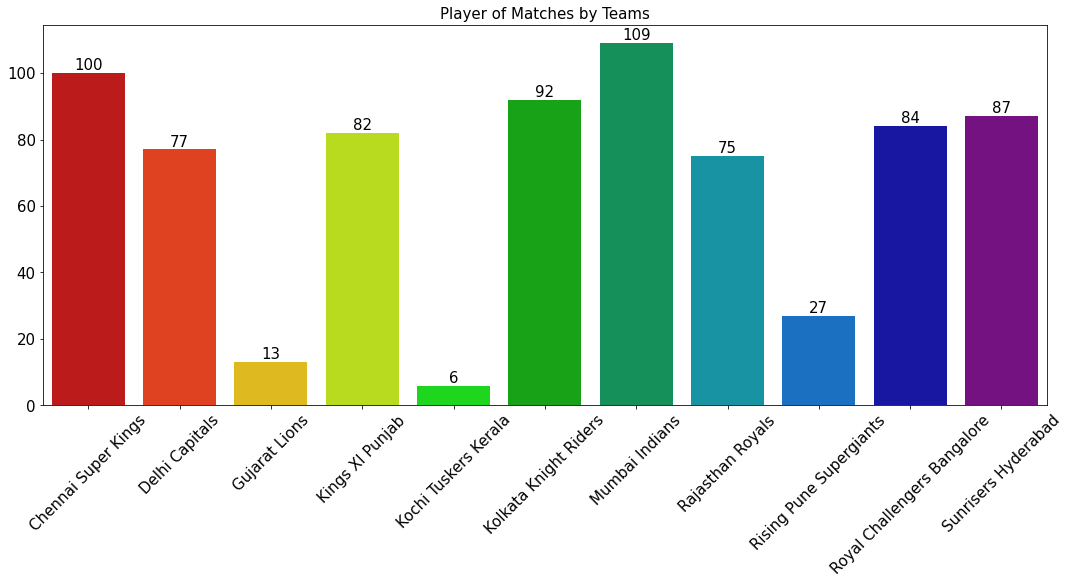

In [83]:
pmt = df.groupby("winner")["player_of_match"].agg(["count"]).reset_index()
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "winner", y = "count", data = pmt, palette = "nipy_spectral_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Player of Matches by Teams", size = 15)
plt.xticks(size = 15, rotation = 45)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Top 10 Cities by Hosting Matches**

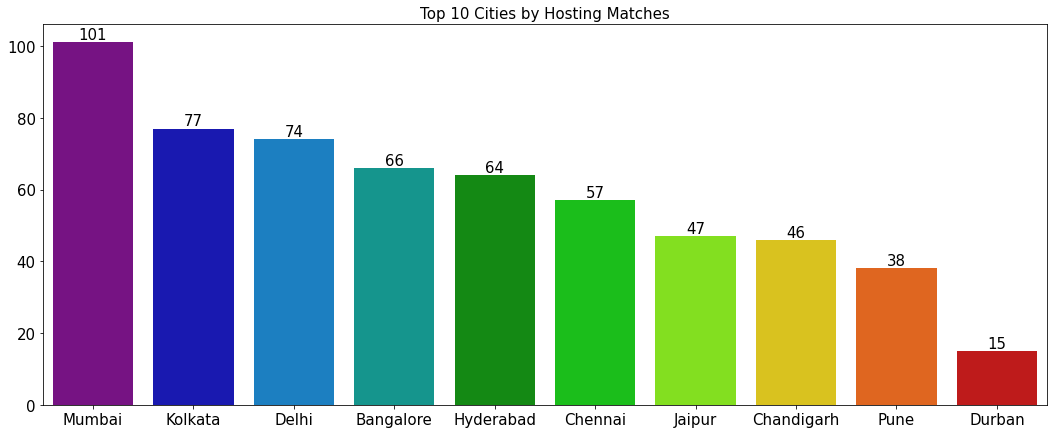

In [84]:
matches = df["city"].value_counts().to_frame().reset_index()
matches.columns = ["City", "Host"]
matches = matches.head(10)
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "City", y = "Host", data = matches, palette = "nipy_spectral")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Top 10 Cities by Hosting Matches", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Toss and Matches by Teams**

In [85]:
toss_winners = df.groupby("toss_winner")["toss_winner"].agg(["count"])
match_winners = df.groupby("winner")["winner"].agg(["count"])
team1 = df.groupby("team1")["team1"].agg(["count"])
team2 = df.groupby("team2")["team2"].agg("count")
teams = pd.concat([toss_winners, match_winners, team1, team2], axis = 1)
teams.columns = ["Toss Win", "Matches Win", "Team 1", "Team 2"]
teams["Matches"] = teams["Team 1"] + teams["Team 2"]
teams = teams.drop(columns = ["Team 1", "Team 2"]).reset_index()
teams.columns = ["Teams", "Toss Win", "Matches Win", "Matches"]
teams["Matches Win %"] = (teams["Matches Win"] / teams["Matches"]) * 100
teams["Matches Lost"] = teams["Matches"] - teams["Matches Win"]
teams = teams[["Teams", "Matches", "Toss Win", "Matches Win", "Matches Lost", "Matches Win %"]]
teams.sort_values(by = "Matches Win %", ascending = False)

,Teams,Matches,Toss Win,Matches Win,Matches Lost,Matches Win %
0,Chennai Super Kings,164,89,100,64,60.975610
6,Mumbai Indians,187,98,109,78,58.288770
5,Kolkata Knight Riders,178,92,92,86,51.685393
7,Rajasthan Royals,147,80,75,72,51.020408
10,Sunrisers Hyderabad,183,89,87,96,47.540984
9,Royal Challengers Bangalore,180,81,84,96,46.666667
3,Kings XI Punjab,176,81,82,94,46.590909
1,Delhi Capitals,177,90,77,100,43.502825
2,Gujarat Lions,30,15,13,17,43.333333
4,Kochi Tuskers Kerala,14,8,6,8,42.857143


**Matches Win and Matches Lost by Teams**

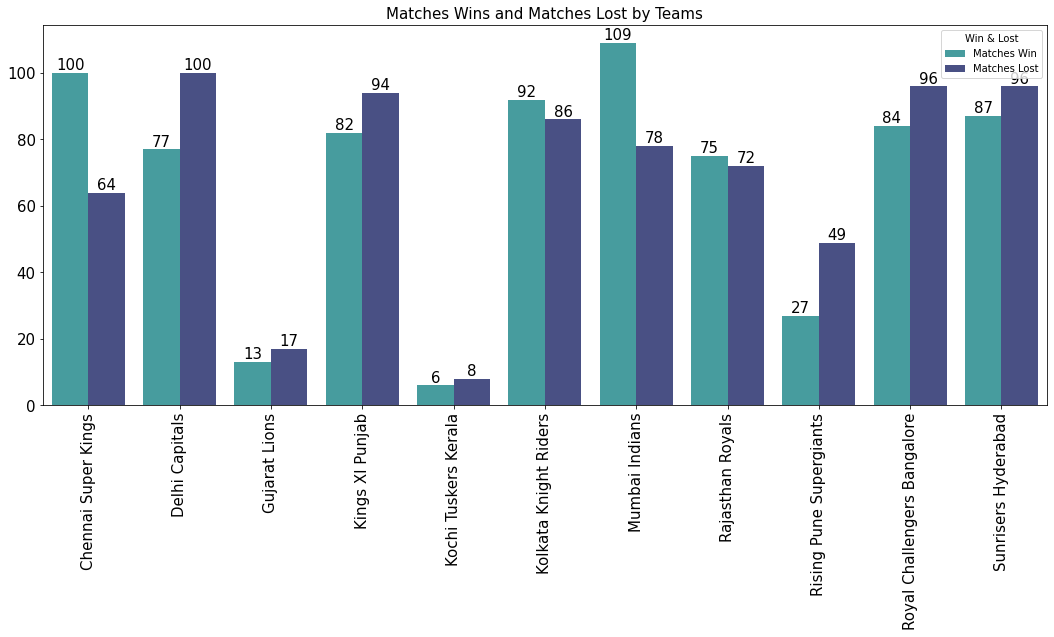

In [86]:
loss_win = teams[["Teams", "Matches Win", "Matches Lost"]]
loss_win = loss_win.melt("Teams", var_name = "Win & Lost", value_name = "Count")
loss_win
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Teams", y = "Count", hue = "Win & Lost", data = loss_win, palette = "mako_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Matches Wins and Matches Lost by Teams", size = 15)
plt.xticks(size = 15,  rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Correlation Matrix of Matches Win by Toss Win**

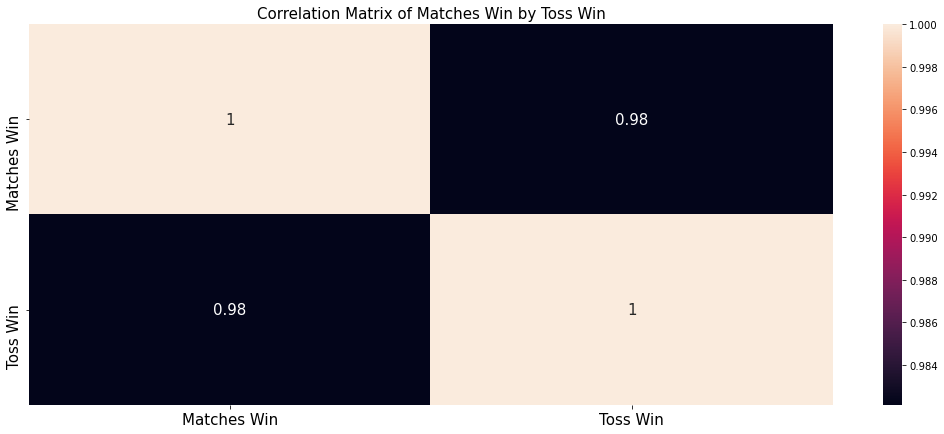

In [87]:
plt.figure(figsize = (18, 7))
correlation = teams[["Matches Win", "Toss Win"]].corr()
sns.heatmap(correlation, annot = True, annot_kws={"size": 15})
plt.title("Correlation Matrix of Matches Win by Toss Win", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

**Toss Wins and Matches Wins by Teams**

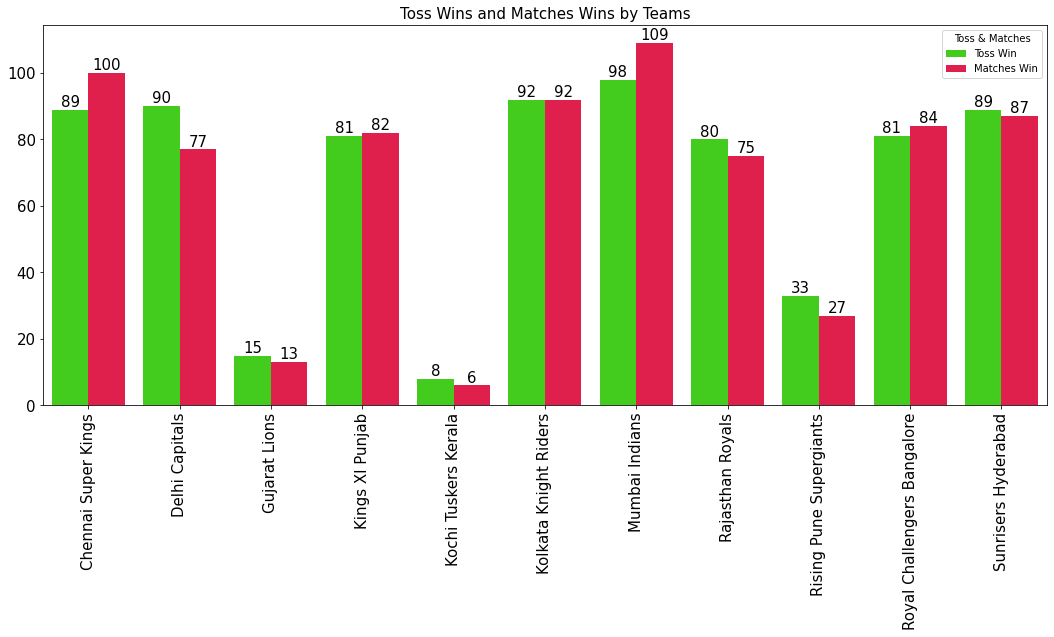

In [88]:
toss_win = teams[["Teams", "Toss Win", "Matches Win"]]
toss_win = toss_win.melt("Teams", var_name = "Toss & Matches", value_name = "Count")
toss_win
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Teams", y = "Count", hue = "Toss & Matches", data = toss_win, palette = "prism")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Toss Wins and Matches Wins by Teams", size = 15)
plt.xticks(size = 15,  rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Batting or bowling Selection of Teams on Toss** 

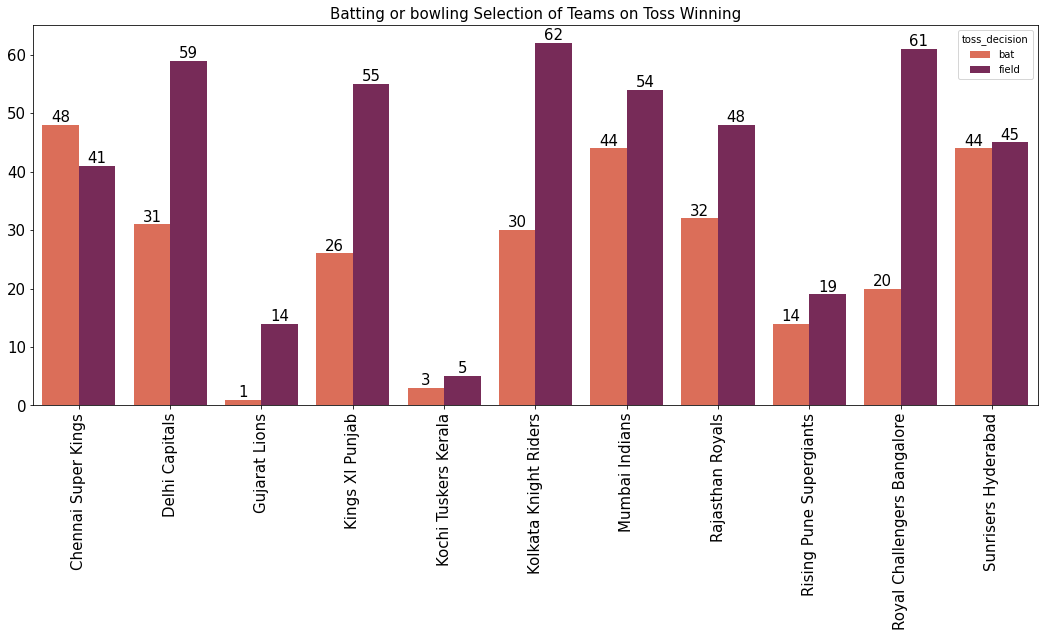

In [89]:
selection = df.groupby(["toss_winner", "toss_decision"])["toss_decision"].agg(["count"])
selection = selection.reset_index()
selection
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "toss_winner", y = "count", hue = "toss_decision", data = selection, palette = "rocket_r")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Batting or bowling Selection of Teams on Toss Winning", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Batting or bowling Selection of Teams on Toss Winning by Cities**

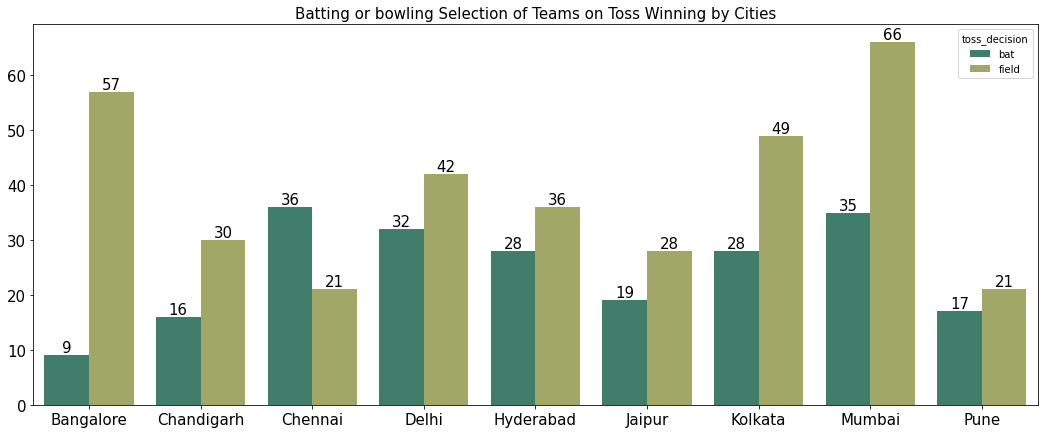

In [90]:
cities = df[(df["city"] == "Hyderabad")
          | (df["city"] == "Mumbai")
          | (df["city"] == "Pune")
          | (df["city"] == "Bangalore")
          | (df["city"] == "Kolkata")
          | (df["city"] == "Delhi")
          | (df["city"] == "Chandigarh")
          | (df["city"] == "Chennai")
          | (df["city"] == "Jaipur")]

city_bat_ball = cities.groupby(["city", "toss_decision"])["toss_decision"].agg(["count"]).reset_index()
city_bat_ball
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "city", y = "count", hue = "toss_decision", data = city_bat_ball, palette = "gist_earth")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.2, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Batting or bowling Selection of Teams on Toss Winning by Cities", size = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()